# Introduction

Let's say we want to identify certain groups of facebook users based on their behavior. Some facebook users might not react on the posts. Some people may 'like' react more and use other reactions like 'love' or 'wow' to a very minute extent. Some people may share posts a lot while some may not. Some only react and not comment on posts. Some may comment but react much, etc.

We are going to identify such groups with the help of <b>machine learning</b>.

# Choosing the Machine Learning Algorithm

We are going to use K-Means Clustering for this purpose. K-Means Clustering is the most popular algorithm which is used for unsupervised learning. This algorithm is used when we have un-labelled data.

# Exploratory Data Analysis (EDA)

First, let's import the relevant python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

I gathered some facebook data from the internet. Let's get this data into a pandas dataframe.

In [2]:
data = pd.read_csv('fb_users.csv')
df = data.copy()  # To keep the data as backup

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [3]:
df.shape

(7050, 9)

Let's check to make sure we don't have any null values in the data.

In [4]:
df.isnull().sum()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

We have no null values. So, we need not worry about it!

Let's first look at the basic statistics of the data. Let's see what we can find from it.

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Our basic statistics shows that almost all the labels are right skewed. Also, by looking at the min and max values, we can say that the difference of these values is quite great. Hence, we need to scale our data.

Now, to scale our data, we need to use a great python library 'sklearn' and it's MinMaxScaler() function from sklearn.preprocessing module.

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Let's instantiate MinMaxScaler object
scaler = MinMaxScaler()

# Scale
scaled_array = scaler.fit_transform(X=df)

type(scaled_array)

numpy.ndarray

The output we got after scaling the dataframe is a numpy array. We need to convert it into a dataframe.

In [7]:
df_scaled = pd.DataFrame(data=scaled_array, columns=df.columns)
df_scaled.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# Clustering

As of now, we have our scaled data ready to be trained. But we have one problem: how many clusters (groups) to put into the data to train? Now, to find out the right number of clusters, we need to decide based on two metrics: <b>Elbow Analysis</b> and <b>Silhouette Score</b>.

## Elbow Analysis

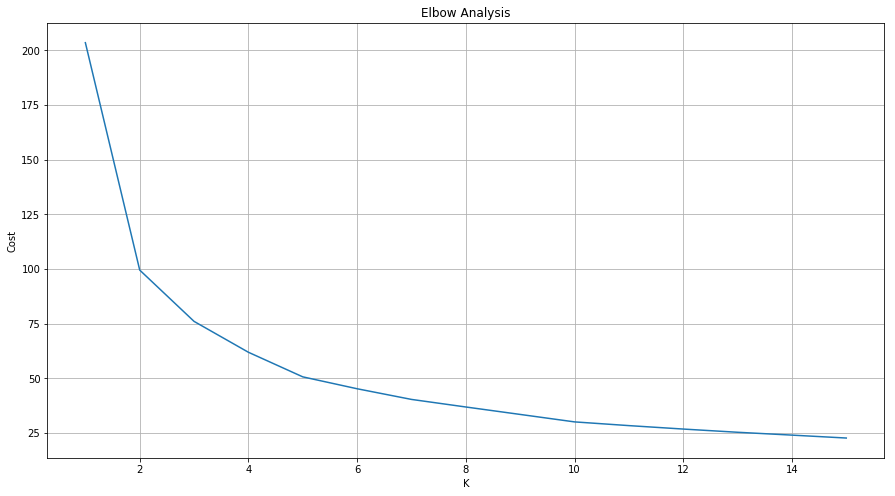

In [8]:
# First, we need to import the sklearn's KMeans library
from sklearn.cluster import KMeans

cost = []

for k in range(1, 16):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(df_scaled)
    cost.append([k, kmean.inertia_])

# Plotting the K's against cost using matplotlib library which we imported at the start
plt.figure(figsize=(15, 8))
plt.plot(pd.DataFrame(cost)[0], pd.DataFrame(cost)[1])
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('Elbow Analysis')
plt.grid(True)

plt.show()

Okay, we can see that on 2 clusters, elbow is being formed. But let's not be hasty in selecting the number 2. Let's also find out the silhouette score to be sure.

## Silhoutte Score

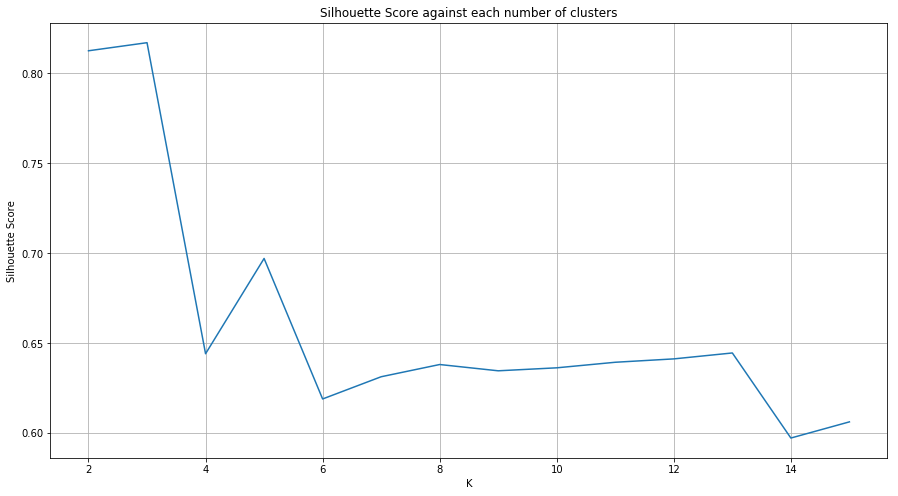

In [9]:
# Let's first import the relevant library
from sklearn.metrics import silhouette_score

score = []

for k in range(2, 16):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(df_scaled)
    score.append([k, silhouette_score(df_scaled, kmean.labels_)])

# Let's plot the Number of K's against Silhouette Score
plt.figure(figsize=(15, 8))
plt.plot(pd.DataFrame(score)[0], pd.DataFrame(score)[1])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.title("Silhouette Score against each number of clusters")

plt.show()

Silhouette score of 3 is pretty high which is a good thing. And by looking at both the elbow analysis and silhouette score. We can decide to choose 3 because the cost of 3 on the Elbow Analysis is quite low and its silhouette score is quite high.

So, let's choose 3.

## Training on the chosen number of K

In [10]:
# Let's make a new dataframe named 'predict' and copy the contents of our original df into it
pred = df.copy()

# Let's train the model based on 3 clusters
kmean_3k = KMeans(n_clusters=3, random_state=0)
labels = kmean_3k.fit_predict(df_scaled)

pred['clusters'] = labels
pred.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0


# Profiling

Having decided how many clusters to use, we would like to get a better understanding of what values are in those clusters are and interpret them. That's where profiling comes in. We can use profiling for data analysis to get insights. Let's do this to find out the user behavior.

In [11]:
pivoted = pred.groupby(['clusters']).median().reset_index()
pivoted

,clusters,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,48.0,3.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0
1,1,1821.5,21.0,2.0,1810.0,0.0,0.0,0.0,0.0,0.0
2,2,1044.5,1955.5,541.5,839.0,164.5,5.0,7.0,1.0,1.0


From the pivoted dataframe shown above, we can see that there are three groups of Facebook users:
1. **Group 0**: Which indicates that the user of this group might not use Facebook a lot or use it only for surfing. Their number of reactions are around 48 and comments only 3. They don't share a lot of posts. And mostly they use 'like' react on posts.


2. **Group 1**: This is the group of people who, according to the provided dataset, happen to use Facebook quite a lot. But they are the kind of people who usually give people the 'like' react mostly.


3. **Group 2**: This group also shows that people use Facebook a lot. These people tend to comment and share the posts a lot. They also tend to use other reacts on posts besides the 'like' react.

Now, to check the number of people in each group:

In [12]:
pred.clusters.value_counts()

0    6498
1     372
2     180
Name: clusters, dtype: int64

Let's graph this by using python's popular <b>seaborn</b> library.

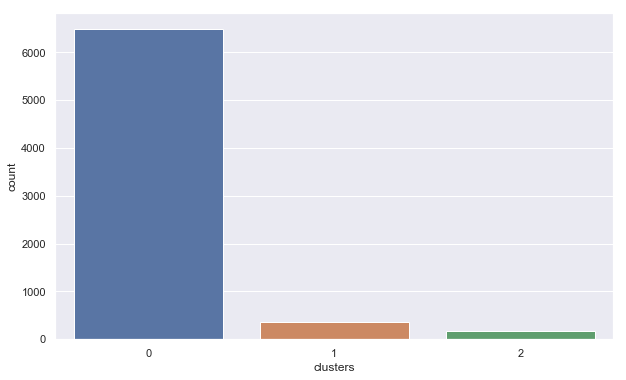

In [13]:
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 6))
sns.countplot(x='clusters', data=pred)

By looking at the above graph. We can conclude that in the given limited dataset, most people belong to group 0.

Let's show it on the Radar Plot as well for better visualization.

In [15]:
import plotly
plotly.tools.set_credentials_file(username='hamzanasir', api_key='xtgOuXcXKXBDmFiaqbuU')

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

In [18]:
radar_data = [
    go.Scatterpolar(
        r=list(pivoted.loc[0, ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
                               'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_reactions']]),
        theta=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
               'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_reactions'],
        fill=None,
        fillcolor=None,
        name='Cluster 0'
    ),
    go.Scatterpolar(
        r=list(pivoted.loc[1, ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
                               'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_reactions']]),
        theta=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
               'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_reactions'],
        fill=None,
        fillcolor=None,
        name='Cluster 1'
    ),
    go.Scatterpolar(
        r=list(pivoted.loc[2, ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
                               'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_reactions']]),
        theta=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
               'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_reactions'],
        fill=None,
        fillcolor=None,
        name='Cluster 2'
    )
]

In [19]:
radar_layout = go.Layout(polar=dict(radialaxis=dict(
    visible=True, range=[0, 9000])), showlegend=True)

fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename="radar")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hamzanasir/0 or inside your plot.ly account where it is named 'radar'
